In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets-with-sarcasm-and-irony/train.csv
/kaggle/input/tweets-with-sarcasm-and-irony/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical

2024-05-10 13:49:37.125128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 13:49:37.125241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 13:49:37.254528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the data
train_data = pd.read_csv('/kaggle/input/tweets-with-sarcasm-and-irony/train.csv')
test_data = pd.read_csv('/kaggle/input/tweets-with-sarcasm-and-irony/test.csv')

# Remove rows where 'tweets' column is NaN
train_data = train_data.dropna(subset=['tweets'])
test_data = test_data.dropna(subset=['tweets'])

train_data = train_data.dropna(subset=['class'])
test_data = test_data.dropna(subset=['class'])

# Display the first few rows
print(train_data.head())

                                              tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative


In [4]:
# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_data['tweets'])

X_train = tokenizer.texts_to_sequences(train_data['tweets'])
X_test = tokenizer.texts_to_sequences(test_data['tweets'])

# Pad sequences
max_length = max([len(x) for x in X_train])  # Get max length of the sequences
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Convert labels to categorical
encoder = LabelEncoder()
encoder.fit(train_data['class'])
y_train = encoder.transform(train_data['class'])
y_test = encoder.transform(test_data['class'])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Create the CNN model
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100, input_length=max_length))  # Increased vocabulary and embedding dimension
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation='relu'))  # Larger dense layer
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Multiclass classification

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1272/1272 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6763 - loss: 0.6588 - val_accuracy: 0.7479 - val_loss: 0.4905
Epoch 2/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7376 - loss: 0.5032 - val_accuracy: 0.7476 - val_loss: 0.4910
Epoch 3/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7360 - loss: 0.5019 - val_accuracy: 0.7480 - val_loss: 0.4898
Epoch 4/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7422 - loss: 0.4946 - val_accuracy: 0.7478 - val_loss: 0.4915
Epoch 5/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7362 - loss: 0.4994 - val_accuracy: 0.7479 - val_loss: 0.4918
Epoch 6/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7400 - loss: 0.4955 - val_accuracy: 0.7476 - val_loss: 0.4925
Epoch 7/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7384 - loss: 0.4961 - val_accuracy: 0.7478 - val_loss: 0.4946
Epoch 8/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7377 - loss: 0.49

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4040 - loss: 0.8032
Test accuracy: 0.75
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2044
           1       0.67      1.00      0.80      2111
           2       1.00      1.00      1.00      1859
           3       0.67      1.00      0.81      2105

    accuracy                           0.75      8119
   macro avg       0.59      0.75      0.65      8119
weighted avg       0.58      0.75      0.65      8119



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


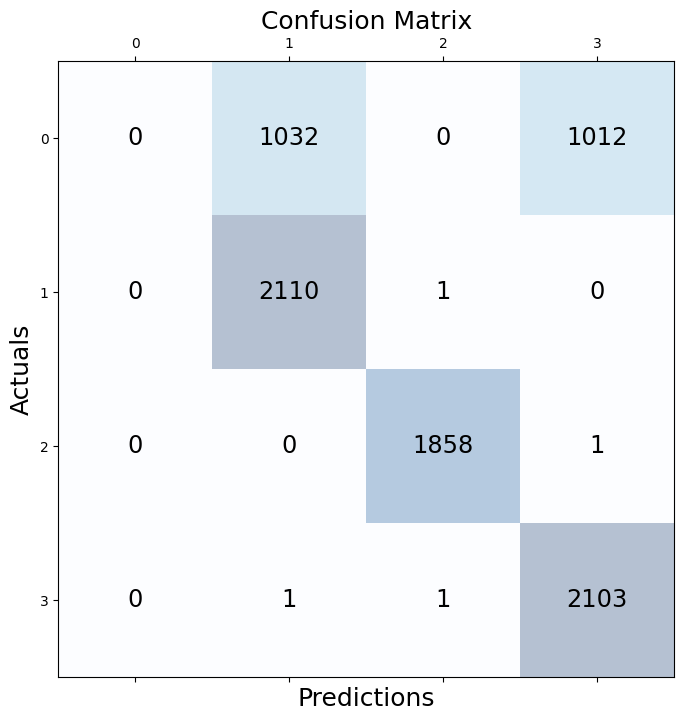

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

# Predict the labels on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()